<h1>Graphing functions with Julia</h1>

<p>Read about this here: <a href="http://mth229.github.io/graphing.html">Graphing Functions with Julia</a>.</p>

<p>For the impatient, <code>Julia</code> has several packages that allow for graphical presentations, but nothing "built-in."  </p>

<p>Several reasonable options exist, but these are the two most common:</p>

<ul>
<li><p><code>Plots</code> which offers a unified front end to several different plotting backends (<code>pyplot</code> or <code>matplotlib</code>;  <code>GR</code>; <code>plotly</code>; <code>unicodeplots</code>; and others).  Plots has a recipe system that makes  it  easier to add default plots to many object types. We will utilize the interface for functions.</p>
</li>
<li><p><code>Makie</code> which offers the most  advanced  graphics interface, especially for 3-d  graphics.  It will <em>likely</em> be the default choice for <code>Julia</code> users at some point. The <code>MTH229</code> packages adds some of the "recipes" from <code>Plots</code> that make graphs of functions easy to make.</p>
</li>
</ul>

<p>In order to use this "package" we need  to load it. In the following we also load a package  for this class  which  provides, among other things,  plot recipes for functions that we will utilize. Loading a package is done  through the <code>using</code> keyword, as follows:</p>

In [1]:
using MTH229
using Plots
plotly()

<p>(Packages must be <em>added</em> once and <em>loaded</em> each  new session.)</p>

<p>The <code>Plots</code> package brings in a <code>plot</code> function that makes plotting functions as easy as specifying a function object and the $x$ domain to plot over:</p>

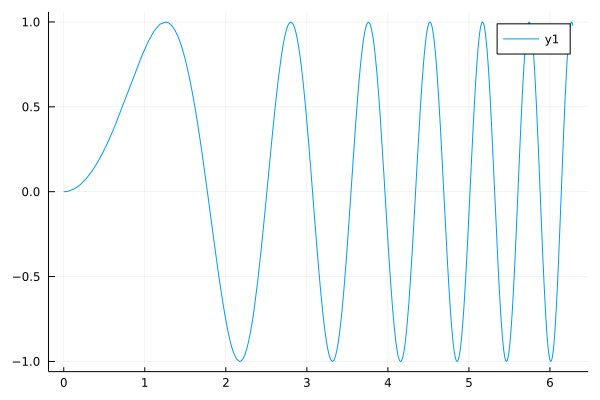

In [1]:
f(x) = sin(x^2)
plot(f, 0, 2pi)

<p>Often most of the battle is <em>judiciously</em> choosing the range of values, $[a,b]$, so that the graph highlights a feature of interest: for example a relative maximum or minimum, a zero, a vertical asymptote, a horizontal asymptote, a slant asymptote...</p>

<p>The use of a function as an argument is not something done with a calculator, but is very useful when using <code>Julia</code> for calculus, as many actions may be viewed as operating on the function $f$, not the values of the function, $f(x)$.</p>

<hr />

<p>More than one function can be plotted on a graph. The <code>plot&#33;</code> function makes this easy: make the first plot with <code>plot</code> and any additional ones with <code>plot&#33;</code>. For example:</p>

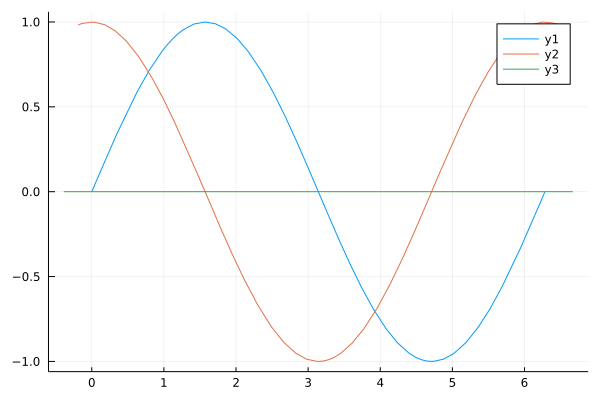

In [1]:
plot(sin, 0, 2pi)
plot!(cos)
plot!(zero)

<p>The legend can be suppressed by specifying <code>legend&#61;false</code> to the first plot; e.g.  <code>plot&#40;sin,0, 2pi, legend&#61;false&#41;</code>.</p>

<p>(A convention in <code>Julia</code> is to use a trailing <code>&#33;</code> in a function name to indicate that the function will modify an existing object. In this case <code>plot&#33;</code> modifies the existing plot, which is implicitly known to the function.)</p>

<hr />

<p>A plot is nothing more than a connect-the-dot graph of paired $x$ and $y$ values. It can be useful to know how to do the steps. The above graph of <code>sin</code> could be done with:</p>

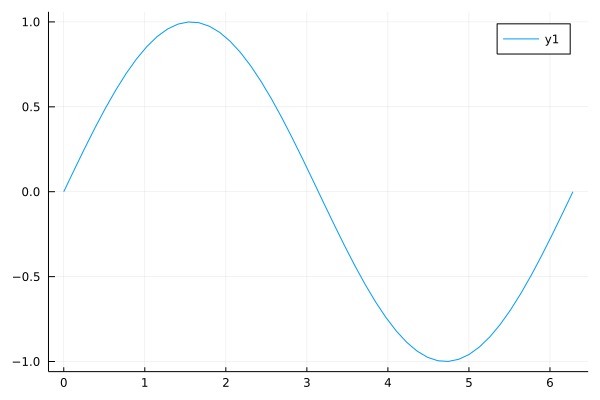

In [1]:
a, b = 0, 2pi
xs = range(a, b, length=50)  		# 50 points between a and b
ys = sin.(xs)	        # or ys = map(sin, xs) or ys = [sin(x) for x in xs] or sin.(xs) (see the notes)
plot(xs, ys)

<p>The <code>xs</code> and <code>ys</code> are written as though they are "plural" because these variables contain 50 values each in a container (a vector in this case). The function call <code>sin.&#40;xs&#41;</code> adds a "dot" between the function name and the parentheses. This syntax instructs <code>Julia</code> to "broadcast" <code>sin</code> to <em>each</em> value in the container <code>xs</code>. Similar commands to do this are <code>map&#40;sin, xs&#41;</code> (a "map") or <code>&#91;sin&#40;x&#41; for x in xs&#93;</code> (a "comprehension").</p>

<p>The plot "recipe" for plotting functions provided  by <code>Plots</code>  does a bit more than this, as it adaptively specifies the points to plot.</p>

<p>The  <code>scatter&#33;</code> function can be used to add points to a graph. These are specified as collections of <code>x</code> and <code>y</code> values.</p>

<h2>NaN values.</h2>

<p>The value <code>NaN</code> is a floating point value that arises during some indeterminate operations, such as <code>0/0</code>. The <code>plot</code> function will stop connecting the dots when it encounters an <code>NaN</code> value. This convention can be gainfully employed.</p>

<h2>Mapping a function over a collection</h2>

<p>In <code>Julia</code> a collection of values can be made by combining them with square brackets, as in <code>&#91;1,1,2,3,5&#93;</code>. The  square  brackets use a vector for  the  enclosing  container. Parentheses also combine  values using a  "tuple."</p>

<p>For reqular patterns the colon operator can be used: <code>1:5</code> is essentially  <code>&#91;1,2,3,4,5&#93;</code>. If  the gap  between succesive  numbers is not  <code>1</code>, but, say, <code>h</code>,  it  can be set  with the syntax  <code>a:h:b</code>.</p>

<p>The <code>range</code> function is  also used  to  specify regular patterns, as in: <code>range&#40;a, b, length&#61;100&#41;</code>. The length is a keyword argument, <code>a</code> and <code>b</code> are positional. Using  the colon  syntax or the <code>range</code> function only creates a means to generate values, rather than the values themselves.</p>

<p>Collections of values are useful for many reasons. We will see later how they are used to store the zeros of a function.</p>

<p><code>Julia</code> has a few different ways of applying a function to each value in a collection.  The <code>map</code> function, called as <code>map&#40;f, collection&#41;</code> will work, as will the "dot" notation of <code>f.&#40;collection&#41;</code>.</p>

<p>For example, here is  <em>one</em>  way to the create values  $1/10,   1/100, \dots, 1/10^5$:</p>

In [1]:
ns = 1:5
f(n) = 1/10^n
f.(ns)

5-element Vector{Float64}:
 0.1
 0.01
 0.001
 0.0001
 1.0e-5